In [9]:
from transformers import AutoModel
import torch

# Load the model
state_dict = torch.load("tokenizer_titok_b64.bin", map_location=torch.device('cpu'))


In [10]:
for name, weights in state_dict.items():
    print(f"Layer: {name} | Shape: {weights.shape}")
    print(weights)


Layer: encoder.class_embedding | Shape: torch.Size([1, 768])
tensor([[ 7.1832e-03, -8.4610e-02, -1.5442e-01, -9.6270e-02,  7.0316e-02,
          8.0093e-02, -1.3900e-01,  2.9306e-02,  1.9541e-02, -3.5855e-02,
          8.0942e-02, -1.2356e-01,  1.0939e-01,  4.6562e-03, -5.6205e-02,
          6.2477e-02,  1.2052e-01,  1.1654e-01, -1.0785e-01,  1.1051e-01,
         -9.4248e-02,  1.3271e-01, -1.1157e-01, -1.6771e-02, -1.6447e-02,
         -4.9026e-03, -8.1547e-02,  2.0453e-01, -5.7362e-02,  1.6608e-02,
          2.8613e-02, -7.7695e-02,  6.5711e-02, -1.0956e-01, -7.1503e-03,
          1.0544e-01,  1.3121e-01,  2.8463e-02,  6.1586e-02, -3.8180e-02,
         -4.7949e-02,  2.8727e-02, -1.8891e-01,  2.2376e-02,  4.2792e-02,
          3.4355e-02,  6.3465e-02, -1.9694e-03,  1.2281e-01, -4.2421e-02,
          3.8745e-02,  3.2442e-02, -4.8309e-02,  1.3238e-01, -2.6644e-02,
          1.7489e-02,  4.6904e-02,  3.6527e-02, -2.3588e-02,  3.1565e-02,
          2.0096e-02, -5.6108e-03,  1.1493e-01, -7.

(512, 512)


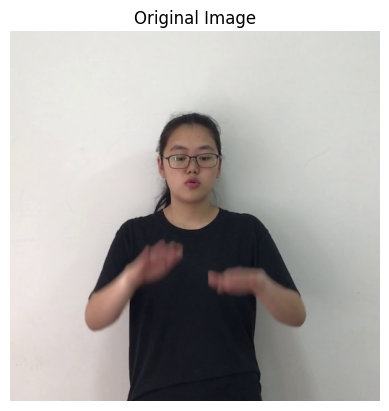

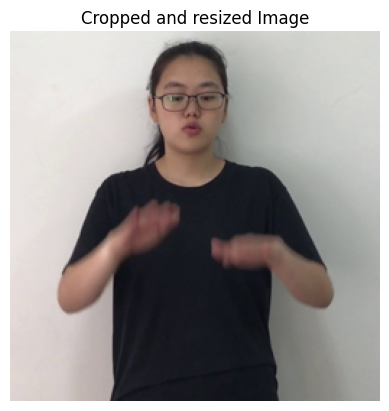

In [15]:
image_path = "/Users/tannicholas/CSL-Daily/sentence/frames_512x512/test/S000475_P0008_T00/000004.jpg"
from PIL import Image
import matplotlib.pyplot as plt

def display_image(image, title="Image"):
    """
    Display an image using matplotlib.
    
    Args:
        image (PIL.Image): The image to display.
        title (str): The title of the image window.
    """
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')  # Turn off the axis labels
    plt.show()

def crop_image(image, left, upper, right, lower):
    """
    Crop an image.

    Args:
        image (PIL.Image): The image to crop.
        left (int): The left edge of the cropping box.
        upper (int): The upper edge of the cropping box.
        right (int): The right edge of the cropping box.
        lower (int): The lower edge of the cropping box.

    Returns:
        PIL.Image: The cropped image.
    """
    return image.crop((left, upper, right, lower))

def resize_image(image, size=(256, 256)):
    """
    Resize the image to the given size.
    
    Args:
        image (PIL.Image): The image to resize.
        size (tuple): The target size as (width, height).
        
    Returns:
        PIL.Image: The resized image.
    """
    return image.resize(size)

# Load the image
image = Image.open(image_path).convert("RGB")
print(image.size)
# Display the original image
display_image(image, "Original Image")

# Define cropping box (left, upper, right, lower)
left = int((512-410)//2)
upper = 512-410
right = left + 410 
lower = upper + 410

# Crop the image
cropped_image = crop_image(image, left, upper, right, lower)

# Resize the cropped image to 256x256
resized_image = resize_image(cropped_image, size=(256, 256))
# Display the cropped image
cropped = display_image(resized_image, "Cropped and resized Image")

In [5]:
from PIL import Image
def is_valid_file(file_path):
    """
    Check if a file is a valid image file by attempting to open it with PIL.
    """
    try:
        with Image.open(file_path) as img:
            img.verify()  # Verifies if the file can be opened as an image
        return True
    except (IOError, SyntaxError, ValueError):
        return False

In [12]:
file_path = "/Users/tannicholas/Downloads/000102.jpg"
is_valid_file(file_path)

True